In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from strategy_implementation import profit_loss_balance, final_balance, buy_hold


df = pd.read_csv("TSLA_weekly_return_volatility.csv")

# locate data of the year
def df_year(df, year):
    df_year = df.loc[df["Year"] == year].reset_index()
    return df_year

# locate X values
def X(df):
    x_value = df.loc[:, ["mean_return", "volatility"]]
    return x_value

# locate Y values
def Y(df):
    y_value = df.loc[:, "label"]
    return y_value

# prepare data
df_18 = df_year(df, 2018)
df_19 = df_year(df, 2019)
df_18.head(2)

,index,Year,Week_Number,mean_return,volatility,label
0,210,2018,0,0.42975,1.832472,green
1,211,2018,1,1.24340,2.890522,green


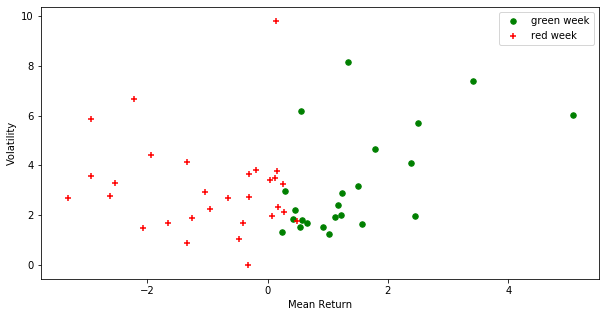

In [3]:
# scatter 2018
green = df_18.loc[df_18["label"] == "green"]
red = df_18.loc[df_18["label"] == "red"]
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(green["mean_return"], green["volatility"], s=30, c="g", marker="o", label="green week")
ax.scatter(red["mean_return"], red["volatility"], s=30, c="r", marker="+", label="red week")
ax.legend()
ax.set_xlabel("Mean Return")
ax.set_ylabel("Volatility")
plt.show()

### 1. Logisic regression equation

In [4]:
# logistic regression does not need to scale
# 2018 for training
X_train = X(df_18)
Y_train = Y(df_18)

# 2019 for testing
X_test = X(df_19)
Y_test = Y(df_19)

# define the model
log_reg_classifier = LogisticRegression()
log_reg_classifier.fit(X_train ,Y_train)

# find coefficients
b = np.round(log_reg_classifier.coef_, 3)
b0 = np.round(log_reg_classifier.intercept_, 3)
# equation: p = 1 / 1 + exp(-(b0 + b1*x1 + b2*x2))
print(f"The logistic regression equation is p = 1 / 1 + exp(-({b0[0]} + {b[0][0]} * x1 + {b[0][1]} * x2)) ")

The logistic regression equation is p = 1 / 1 + exp(-(0.504 + -2.543 * x1 + 0.157 * x2)) 


### 1.1 Predict label for 2019

In [5]:
# prediction
prediction = log_reg_classifier.predict(X_test)
prediction

array(['red', 'green', 'red', 'red', 'green', 'red', 'red', 'red', 'red',
       'red', 'red', 'red', 'green', 'red', 'red', 'green', 'red',
       'green', 'red', 'red', 'red', 'red', 'green', 'green', 'green',
       'red', 'green', 'green', 'green', 'red', 'green', 'red', 'red',
       'red', 'green', 'red', 'green', 'red', 'red', 'red', 'green',
       'green', 'green', 'red', 'green', 'green', 'red', 'red', 'green',
       'green', 'green', 'green', 'red'], dtype=object)

### 2. Calculate accuracy score

In [9]:
accuracy = log_reg_classifier.score(X_train ,Y_train)
print(f"The overall accuracy is {accuracy:.2f}.")

The overall accuracy is 0.92.


0.9433962264150944

### 3. Compute confusion matrix

In [6]:
cm = confusion_matrix(Y_test, prediction)
print("The confusion matrix is \n", cm)

The confusion matrix is 
 [[22  2]
 [ 1 28]]


### 4. True positive rate (sensitivity or recall) and true negative rate (specificity) for year 2

In [7]:
# true positive rate (sensitivity or recall) TPR=TP/(TP+FN)
true_pos_rate = 22 / (22 + 2)

# true negative rate (specificity) TNR=TN/(TN+FP)
true_neg_rate = 28 / (28 + 1)
print(f"For 2019, true positive rate is {true_pos_rate:.2f}, and true negative rate is {true_neg_rate:.2f}")

For 2019, true positive rate is 0.92, and true negative rate is 0.97


### 5. Implement the strategy

In [8]:
# assign new labels for 2019
df_19.loc[:, "label"] = prediction
green_weeks = df_19.loc[df_19["label"] == "green", "Week_Number"].tolist()

# select 2019 data
trade_18_19 = pd.read_csv("Trade_18_19.csv") 
columns = ["Week_Number", "Adj Close", "Return", "Account Balance"]
trade_19 = trade_18_19.loc[trade_18_19["Year"] == 2019, columns].reset_index()

# import strategy implementation function from file
invest = 100
new_balance_19 = profit_loss_balance(trade_19, invest, green_weeks)
new_final_balance = final_balance(new_balance_19)
print(f"The final balance of logistic regression strategy implementation is {new_final_balance}")

The final balance of logistic regression strategy implementation is 457.87


In [9]:
# original label strategy
original_label_balance = final_balance(trade_19)
print(f"The final balance of original label strategy implementation is {original_label_balance}")

The final balance of original label strategy implementation is 691.16


In [10]:
# buy-and-hold strategy
buy_in_price = trade_19.loc[0, "Adj Close"]
close_price = trade_19.at[trade_19.index[-1], "Adj Close"]
buy_hold_balance = buy_hold(invest, buy_in_price, close_price)
print(f"The final balance of buy-and-hold strategy implementation is {buy_hold_balance}")

The final balance of buy-and-hold strategy implementation is 134.89


#### With the comparison among the logistic regression strategy, original label strategy, and buy-and-hold strategy, the logistic regression strategy is much better than buy-and-hold strategy even though the original label strategy results in the highest value at the end. 